Input n: 3

Untuk nilai a = 1 dan b = 2
y = 0.5 + e^(-1x^2)|cos(2x)|


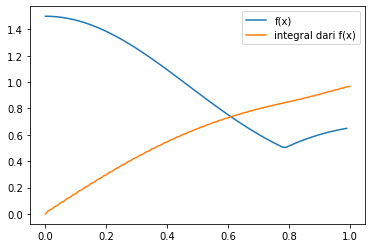

Luas daerah = 0.9675085481 hektar

Untuk nilai a = 4 dan b = 2
y = 0.5 + e^(-4x^2)|cos(2x)|


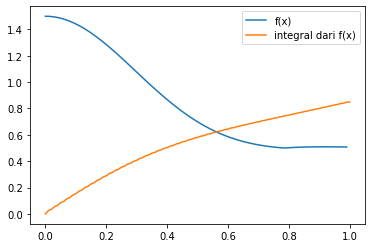

Luas daerah = 0.8493851062 hektar

Untuk nilai a = 8 dan b = 8
y = 0.5 + e^(-8x^2)|cos(8x)|


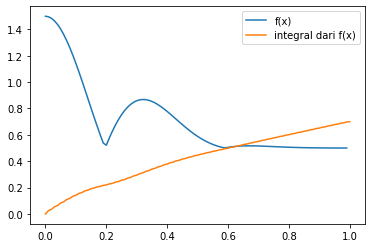

Luas daerah = 0.6995590960 hektar

Luas tanah yang akan dibagi ke Juki adalah 0.9675085481


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos 

result = 0.0

n = int(input("Input n: ")) #Masukan jumlah pengulangan yang diinginkan
print()

def f(x, a, b):
    return exp(-a*x**2)*abs(cos(b*x))+1/2 #Fungsi f(x) yang sudah dirandomize nilai a & bnya

def Integral(a, b):
    genap = ganjil = 0
    for i in range(1, 100): #jumlah step yang harus dilakukan untuk xi=a+i*h=0+i*(1-0)/100=i/100
        if i % 2 == 0:
            genap = genap + f(i/100, a, b) #Nilai f(xi) untuk i bernilai genap (2i)
        else:
            ganjil = ganjil + f(i/100, a, b) #Nilai f(xi) untuk i bernilai ganjil (2i-1)
    
    return 1/300*(f(0, a, b) + 2*genap + 4*ganjil + f(1, a, b)) #Sumasi untuk mengaproksimasi integral dengan metode komposit simpsons

def IntegralGrafik(a, b, y2): #Karena fungsi integralnya sulit digrafik, akan digrafikan proses sumasinya dari x=0 hingga x=1 menuju hasil luas
    genap = ganjil = 0
    for i in range(1, 100): 
        if i % 2 == 0:
            genap = genap + f(i/100, a, b)
            y2 = np.append(y2, 1/300*(f(0, a, b) + 2*genap + 4*ganjil)) #Mengupdate sumasi untuk mencari koordinat saat i bernilai genap
        else:
            ganjil = ganjil + f(i/100, a, b)
            y2 = np.append(y2, 1/300*(f(0, a, b) + 2*genap + 4*ganjil)) #Mengupdate sumasi untuk mencari koordinat saat i bernilai ganjil
    y2 = np.append(y2, 1/300*(f(0, a, b) + 2*genap + 4*ganjil + f(1, a, b))) #Memplot titik terakhir grafik yaitu (1, Hasil Luas)
    return y2

for j in range(0, n):
    a = random.randint(1, 9) #A memilih bilangan bulat random diantara 1-9
    b = random.randint(1, 9) #B memilih bilangan bulat random diantara 1-9
    print("Untuk nilai a = %d dan b = %d" %(a, b)) #Mendisplay nilai a & b yang digenerate
    print("y = 0.5 + e^(-%dx^2)|cos(%dx)|" %(a, b)) #Mendisplay fungsi f(x) yang digenerate
    t1 = np.arange(0.0, 1.0, 0.01) 
    t2 = np.arange(0.0, 1.0, 1/100)
    t2 = np.append(t2, 1)
    y1 = np.array(f(t1, a, b))
    y2 = np.array([])
    y2 = np.append(y2, 0)
    y2 = IntegralGrafik(a, b, y2)
    plt.plot(t1, y1) #Membuat grafik fungsi f(x) yang digenerate
    plt.plot(t2, y2) #Membuat grafik integral fungsi f(x) dengan sumasi
    plt.axis('tight')
    plt.legend(["f(x)", "integral dari f(x)"], loc ="upper right") #Memberi keterangan masing-masing warna merupakan grafik fungsi apa
    plt.show()
    print("Luas daerah = %.10f hektar" %Integral(a, b)) #Mendisplay luas integral untuk fungsi tersebut
    print("====================================================")
    print()

    if Integral(a,b) > result: #Membandingkan luasnya, yang terbesar akan dipilih untuk dibagikan oleh Juki
        result = Integral(a,b)

print("Luas tanah yang akan dibagi ke Juki adalah %.10f" %(result))